p [ 5.92440973 13.9714966   1.70000001 13.89012121]
e [[1.47405509e-02 1.59631508e-01 3.72951963e-02 7.07306833e-03]
 [1.59631508e-01 2.14060291e+00 5.18034798e-01 1.20242166e-02]
 [3.72951963e-02 5.18034798e-01 1.55461444e-01 8.38467028e-11]
 [7.07306833e-03 1.20242166e-02 8.38466971e-11 1.88438114e-02]]


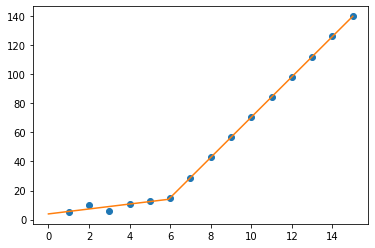

In [13]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15], dtype=float)
y = np.array([5, 10, 6, 11, 13, 15, 28.92, 42.81, 56.7, 70.59, 84.47, 98.36, 112.25, 126.14, 140.03])

'''
拟合两条直线，两条直线都过(x0,y0)，第一条斜率为k1，第二条斜率为k2
'''
def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*(x-x0)+y0, lambda x:k2*(x-x0) + y0])

'''
返回值p是参数
'''
p , e = optimize.curve_fit(piecewise_linear, x, y)
print('p',p)
print('e',e)
xd = np.linspace(0, 15, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))
plt.show()

p [  0.34356068   4.26086987  -9.9716432  -57.05449162   0.37704094
   5.89779234]
e [[inf inf inf inf inf inf]
 [inf inf inf inf inf inf]
 [inf inf inf inf inf inf]
 [inf inf inf inf inf inf]
 [inf inf inf inf inf inf]
 [inf inf inf inf inf inf]]


/Library/Python/3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


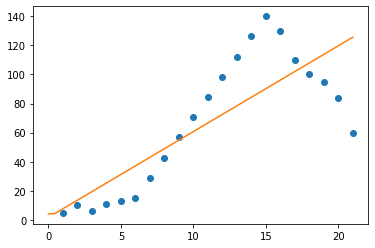

In [14]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], dtype=float)
y = np.array([5, 10, 6, 11, 13, 15, 28.92, 42.81, 56.7, 70.59, 84.47, 98.36, 112.25, 126.14, 140.03, 130, 110, 100, 95, 84, 60])

def piecewise3_linear(x, x0, y0, x1, y1, k1, k3):
    return np.piecewise(x, [x < x0, (x >= x0) & (x < x1)], \
                        [lambda x:k1*(x-x0)+y0, lambda x:(y1-y0)/(x1-x0)*(x-x0) + y0, lambda x:k3*(x-x1)+y1])

p , e = optimize.curve_fit(piecewise3_linear, x, y)
print('p',p)
print('e',e)
xd = np.linspace(0, 21, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise3_linear(xd, *p))
plt.show()

pars Parameters([('step_amplitude', <Parameter 'step_amplitude', value=44.67741984482687, bounds=[-inf:inf]>), ('step_center', <Parameter 'step_center', value=11.0, bounds=[-inf:inf]>), ('step_sigma', <Parameter 'step_sigma', value=2.0, bounds=[-inf:inf]>), ('line_slope', <Parameter 'line_slope', value=0, bounds=[-inf:inf]>), ('line_intercept', <Parameter 'line_intercept', value=5.0, bounds=[-inf:inf]>)])
[[Model]]
    (Model(step, prefix='step_', form='linear') + Model(linear, prefix='line_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 87
    # data points      = 21
    # variables        = 5
    chi-square         = 803.799381
    reduced chi-square = 50.2374613
    Akaike info crit   = 86.5413728
    Bayesian info crit = 91.7639849
[[Variables]]
    step_amplitude:  272.009557 +/- 26.9538677 (9.91%) (init = 44.67742)
    step_center:     3.46566858 +/- 0.26569147 (7.67%) (init = 11)
    step_sigma:      11.5343330 +/- 0.49338998 (4.28%) (init = 2)
 

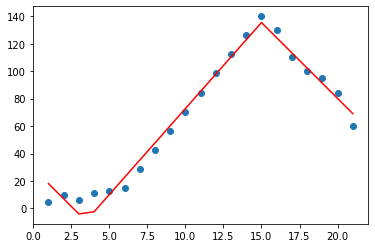

In [16]:
from lmfit.models import StepModel, LinearModel
step_mod = StepModel(form='linear', prefix='step_')
line_mod = LinearModel(prefix='line_')

model = step_mod + line_mod

# make named parameters, giving initial values:
pars = model.make_params(line_intercept=y.min(),
                         line_slope=0,
                         step_center=x.mean(),
                         step_amplitude=y.std(),
                         step_sigma=2.0)

print('pars', pars)

# fit data to this model with these parameters
out = model.fit(y, pars, x=x)

# print results
print(out.fit_report())

# plot data and best-fit
plt.plot(x, y, 'o')
plt.plot(x, out.best_fit, 'r-')
plt.show()